# 911 Calls

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [166]:
df = pd.read_csv('911.csv')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [168]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Discovering missing values and cleaning the data **

In [169]:
df.fillna(value=0, inplace=True)

In [170]:
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

** What are the top 5 zipcodes for 911 calls? **

In [239]:
df[df['zip'] > 0]['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [243]:
df[df['twp'] != 0]['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic **

In [254]:
df['title'].head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

** Creating a column with reasons for 911 calls **

In [255]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [256]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [257]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

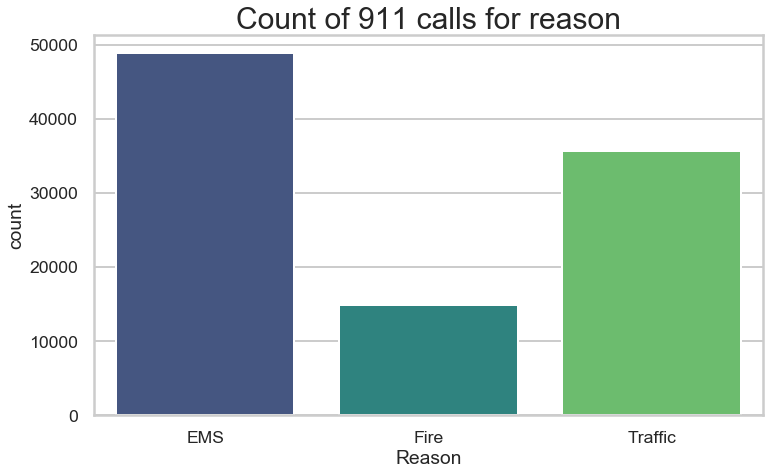

In [322]:
plt.figure(figsize=(12,7))
sns.countplot(x='Reason', data=df, palette='viridis')
plt.title('Count of 911 calls for reason', fontdict={'fontsize': 30})
plt.show()

** What is the data type of the objects in the timeStamp column? **

In [308]:
type(df['timeStamp'][0])

str

** Converting the column from strings to DateTime objects. **

In [310]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [311]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

** Creating a columns for hour, month and day of week **

In [314]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.weekday())

In [319]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Column Days of Week from numbers to words **

In [317]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [318]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Creating a countplot of the Day of Week column with the hue based off of the Reason column. **

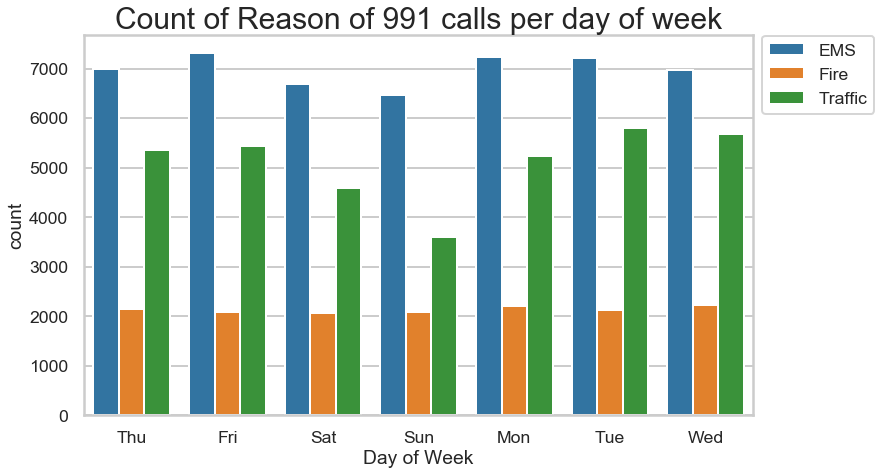

In [331]:
plt.figure(figsize=(12,7))
sns.countplot(x='Day of Week', hue='Reason', data=df)
plt.title('Count of Reason of 991 calls per day of week', fontdict={'fontsize': 30})
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.show()

** Now based on the months **

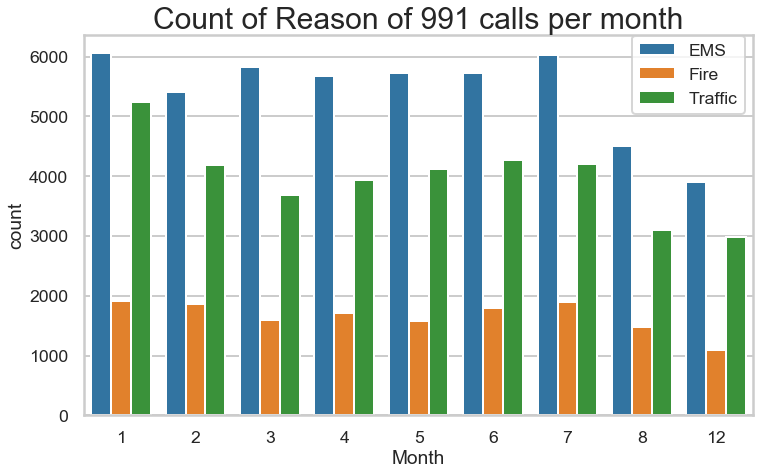

In [333]:
plt.figure(figsize=(12,7))
sns.countplot(x='Month', hue='Reason', data=df)
plt.title('Count of Reason of 991 calls per month', fontdict={'fontsize': 30})
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.show()

**Creating a new column called 'Date' that contains only the date from the timeStamp column.

In [334]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [336]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

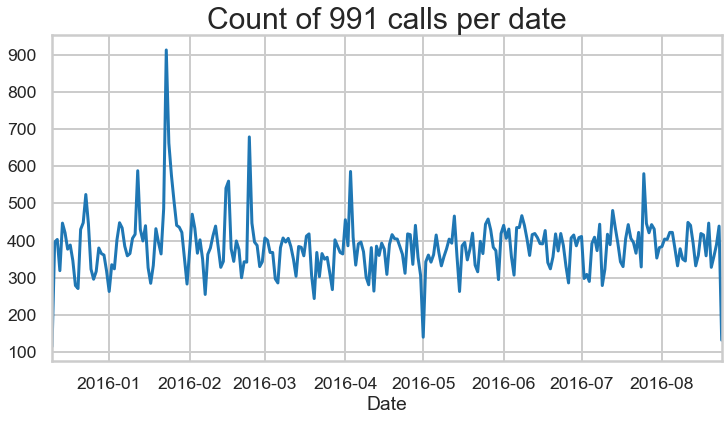

In [339]:
plt.figure(figsize=(12,6))
df.groupby('Date')['Hour'].count().plot()
plt.title('Count of 991 calls per date',  fontdict={'fontsize': 30})
plt.show()

** recreating this plot but creating 3 separate plots with each plot representing a Reason for the 911 call **

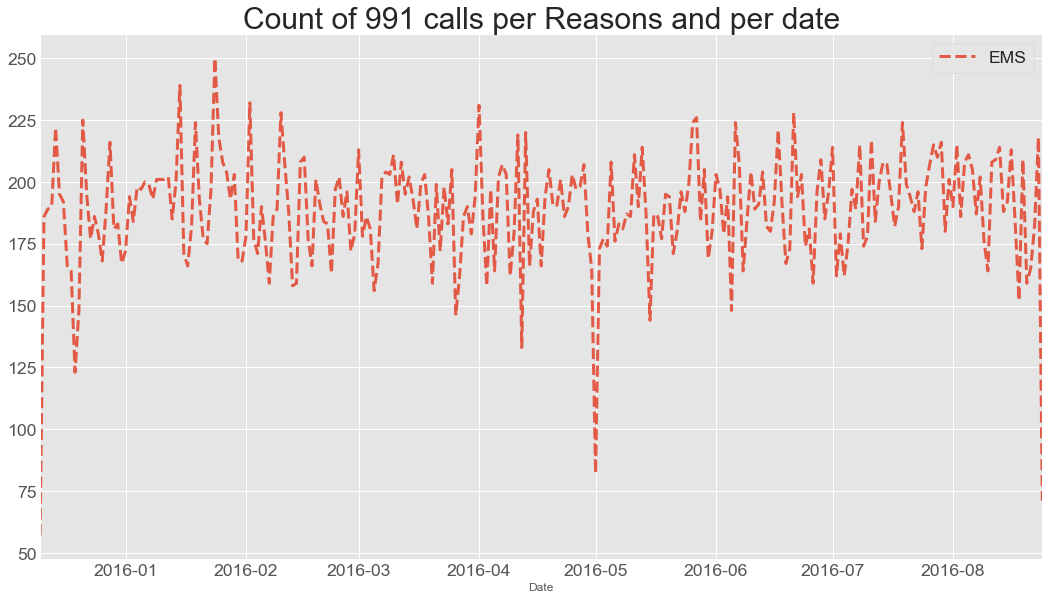

In [409]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
df[df['Reason'] == 'EMS'].groupby('Date')['Hour'].count().plot(label='EMS', stacked=True, alpha=0.9, lw=3, ls='--')
plt.title('Count of 991 calls for EMS per date',  fontdict={'fontsize': 30})
plt.legend()
plt.show()

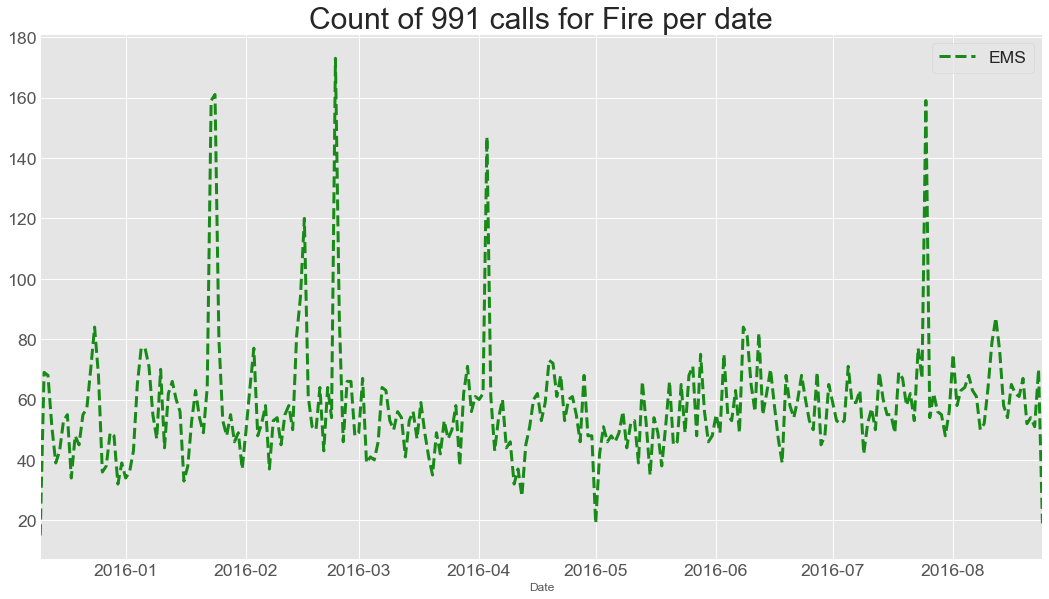

In [412]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
df[df['Reason'] == 'Fire'].groupby('Date')['Hour'].count().plot(label='EMS', stacked=True, alpha=0.9, lw=3, ls='--', color='green')
plt.title('Count of 991 calls for Fire per date',  fontdict={'fontsize': 30})
plt.legend()
plt.show()

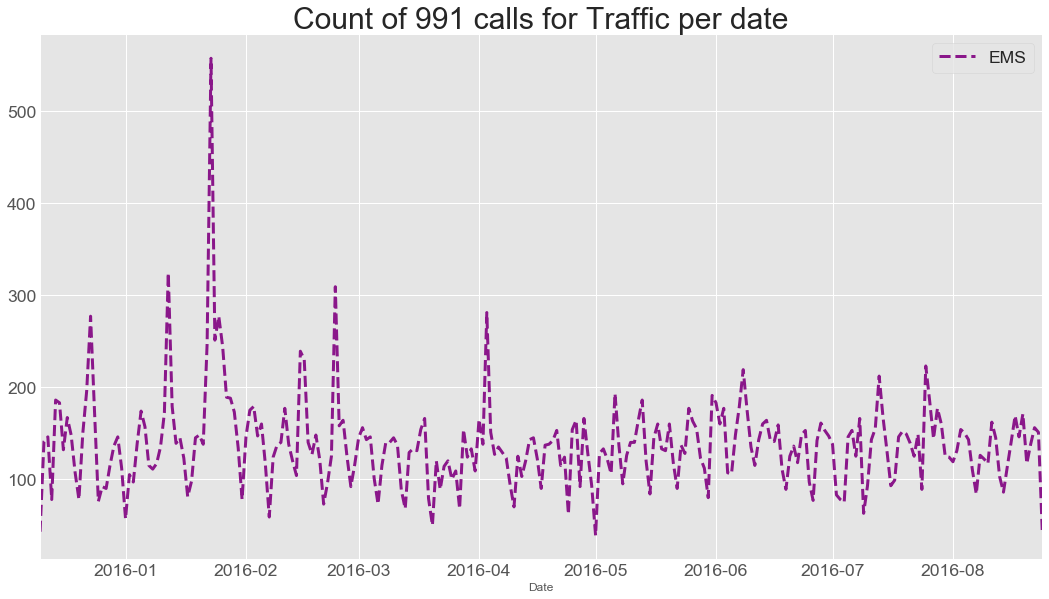

In [415]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
df[df['Reason'] == 'Traffic'].groupby('Date')['Hour'].count().plot(label='EMS', stacked=True, alpha=0.9, lw=3, ls='--',color='purple')
plt.title('Count of 991 calls for Traffic per date',  fontdict={'fontsize': 30})
plt.legend()
plt.show()

** creating  heatmaps with seaborn and our data. **

** restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [418]:
newdf = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()

In [419]:
newdf.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now creating a HeatMap using this new DataFrame. **

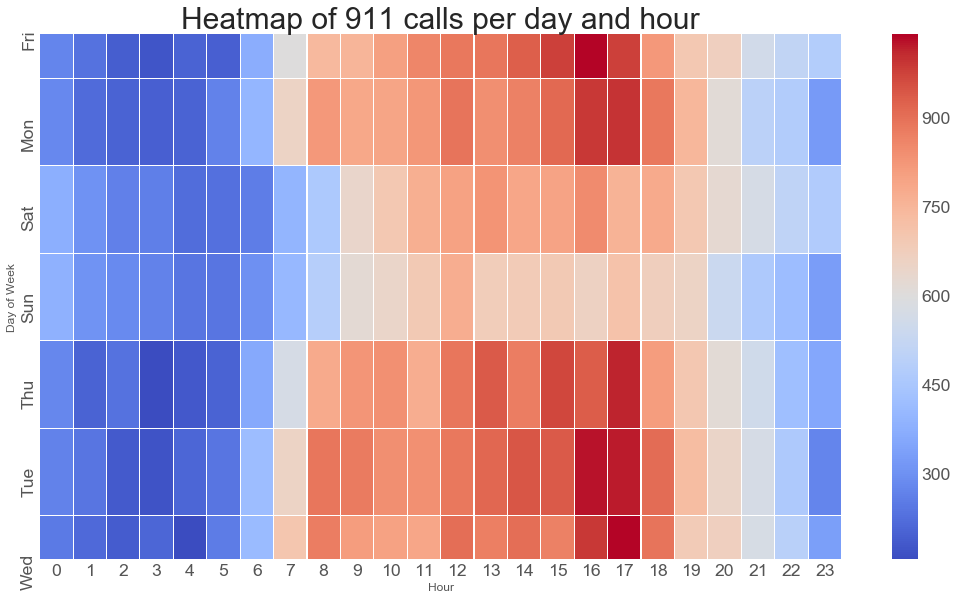

In [439]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
sns.heatmap(newdf, cmap='coolwarm', linecolor='white', linewidths=0.1)
plt.title('Heatmap of 911 calls per day and hour',  fontdict={'fontsize': 30})
plt.show()

** Now creating a clustermap to produce a clustered version of the heatmap. **

<Figure size 1152x648 with 0 Axes>

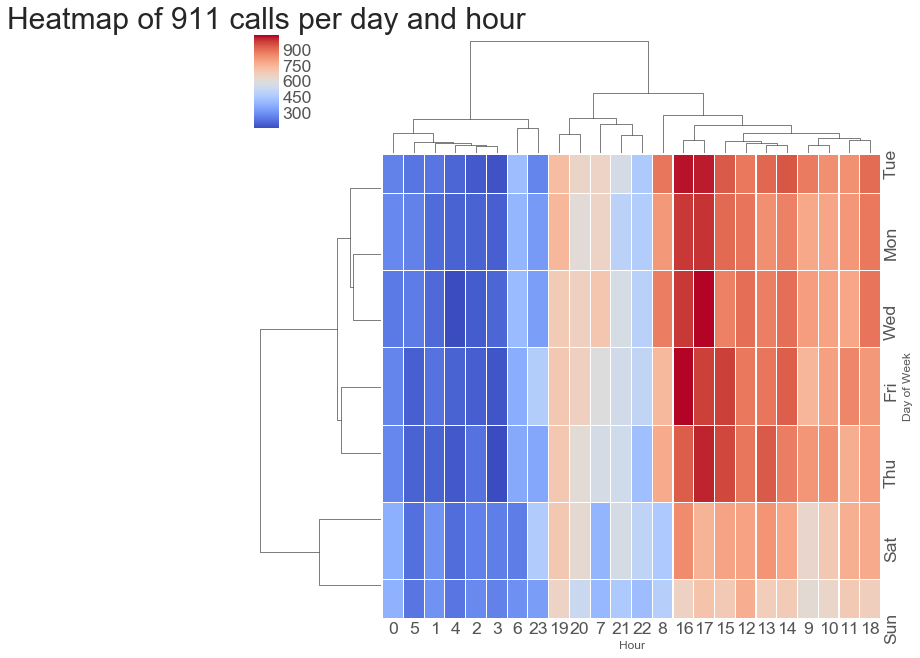

In [440]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
sns.clustermap(newdf, cmap='coolwarm', linecolor='white', linewidths=0.1)
plt.title('Heatmap of 911 calls per day and hour',  fontdict={'fontsize': 30})
plt.show()